In [ ]:
# Veri işleme ve görselleştirme için kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri ön işleme ve modelleme için kütüphaneler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Excel dosyasını yükleme
data = pd.read_excel(r"C:\Users\ilayd\OneDrive\Masaüstü\Telco Customer Churn.xlsx")

In [3]:
data_copy = data.copy()
# İlk birkaç satırı görüntüleme
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [4]:
# Veri setinin boyutları ve sütun bilgileri
print(data.shape)
print(data.info())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  Pay

In [5]:
# Eksik değer kontrolü
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# 'customerID' gibi anlamlı olmayan sütunları çıkarma
data = data.drop(columns=['customerID'])

C:\Users\ilayd\AppData\Local\Temp\ipykernel_8924\819961435.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percent.index, y=churn_percent.values, palette=["#FC4E07", "#E7B800"])


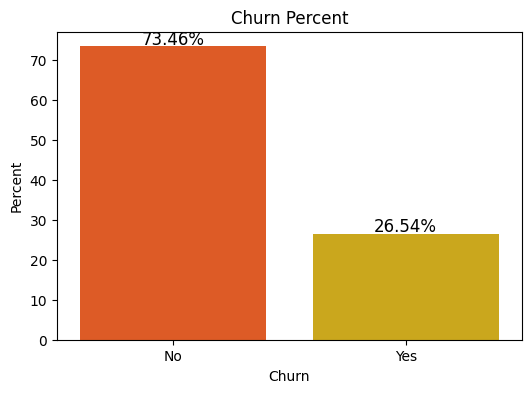

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [7]:
# Hedef değişkenin (Churn) dağılımını hesapla ve görselleştir
churn_counts = data['Churn'].value_counts()
churn_percent = (churn_counts / churn_counts.sum()) * 100

# Görselleştirme
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_percent.index, y=churn_percent.values, palette=["#FC4E07", "#E7B800"])

# Yüzdeyi her çubuğun üzerine ekleyelim
for i, v in enumerate(churn_percent.values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', size=12)

# Başlık ve etiketler
plt.title('Churn Percent')
plt.xlabel('Churn')
plt.ylabel('Percent')
plt.show()

print(data['Churn'].value_counts())  # Churn sütunundaki sınıfların dağılımı

In [8]:
# Veri türlerini kontrol edin
print(data.dtypes)

# Örneğin 'object' türündeki sütunlarda hangi veri tiplerinin olduğunu kontrol edin
for column in data.select_dtypes(include=['object']).columns:
    print(f"{column} - Benzersiz Değerler:")
    print(data[column].apply(type).value_counts())

gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object
gender - Benzersiz Değerler:
gender
<class 'str'>    7043
Name: count, dtype: int64
Partner - Benzersiz Değerler:
Partner
<class 'str'>    7043
Name: count, dtype: int64
Dependents - Benzersiz Değerler:
Dependents
<class 'str'>    7043
Name: count, dtype: int64
PhoneService - Benzersiz Değerler:
PhoneService
<class 'str'>    7043
Name: count, dtype: int64
MultipleLines - Benzersiz Değerler:
MultipleLines
<class 'str'>    7043
Name: count, dty

In [9]:
# 'MonthlyCharges' ve 'TotalCharges' sütunlarındaki 'datetime' ve 'str' verileri sayısal hale getirelim
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Hatalı değerler (NaN) varsa ortalamalarla doldurma
data['MonthlyCharges'].fillna(data['MonthlyCharges'].mean(), inplace=True)
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

C:\Users\ilayd\AppData\Local\Temp\ipykernel_8924\4015120124.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MonthlyCharges'].fillna(data['MonthlyCharges'].mean(), inplace=True)
C:\Users\ilayd\AppData\Local\Temp\ipykernel_8924\4015120124.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [10]:
# 'Churn' sütununu sayısal hale getirelim (0: No, 1: Yes)
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

In [11]:
le = LabelEncoder()

# Kategorik sütunları sayısal hale getirme
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])


In [12]:
# Özellikler (X) ve hedef değişken (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Eğitim ve test setlerine ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Modeli oluşturma ve eğitme
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = rf_model.predict(X_test)

In [14]:
# Modelin eğitiminde kullanılan özelliklerin (bağımsız değişkenlerin) ilk 5 satırını gösterme
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.80000
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.45000
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45000
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.95000
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,2318.24987


In [15]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,70.56996,2318.24987
2715,1,0,0,0,41,1,2,2,1,1,1,1,1,1,0,1,0,25.25000,996.45000
3825,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35000,1031.70000
1807,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,76.35000,76.35000
132,1,0,0,0,67,1,0,0,0,0,0,2,0,0,2,0,0,50.55000,3260.10000


In [16]:
# Doğruluk skoru
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk: {accuracy * 100:.2f}%")

# Karışıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Sınıflandırma raporu
print("Classification Report:")
print(classification_report(y_test, y_pred))

Doğruluk: 79.63%
Confusion Matrix:
[[944  92]
 [195 178]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [17]:
# Tahmin edilen olasılıkları alma
probabilities = rf_model.predict_proba(X_test)[:, 1]

# Tahmin edilen olasılıkları müşterilerle birleştirme
risk_df = X_test.copy()
risk_df['Churn_Probability'] = probabilities
risk_df['Actual_Churn'] = y_test.values

# Risk seviyeleri ekleme
def assign_risk(prob):
    if prob < 0.33:
        return "Düşük Risk"
    elif prob < 0.66:
        return "Orta Risk"
    else:
        return "Yüksek Risk"

risk_df['Risk_Level'] = risk_df['Churn_Probability'].apply(assign_risk)

# Risk seviyelerinin dağılımı
risk_counts = risk_df['Risk_Level'].value_counts()
print("Risk Seviyesi Dağılımı:\n", risk_counts)

# Yüksek risk taşıyan müşteriler
high_risk_customers = risk_df[risk_df['Risk_Level'] == "Yüksek Risk"]

# Sadece sayısal sütunları analiz etmek
high_risk_summary = high_risk_customers.drop(columns=['Risk_Level', 'Actual_Churn']).mean()

print("Yüksek Risk Grubu Özellik Ortalamaları:\n", high_risk_summary)


Risk Seviyesi Dağılımı:
 Risk_Level
Düşük Risk     921
Orta Risk      338
Yüksek Risk    150
Name: count, dtype: int64
Yüksek Risk Grubu Özellik Ortalamaları:
 gender                 0.460000
SeniorCitizen          0.306667
Partner                0.240000
Dependents             0.120000
tenure                 6.893333
PhoneService           0.933333
MultipleLines          1.106667
InternetService        0.913333
OnlineSecurity         0.126667
OnlineBackup           0.286667
DeviceProtection       0.513333
TechSupport            0.126667
StreamingTV            0.873333
StreamingMovies        0.913333
Contract               0.006667
PaperlessBilling       0.866667
PaymentMethod          1.973333
MonthlyCharges        78.495931
TotalCharges         700.315328
Churn_Probability      0.811400
dtype: float64


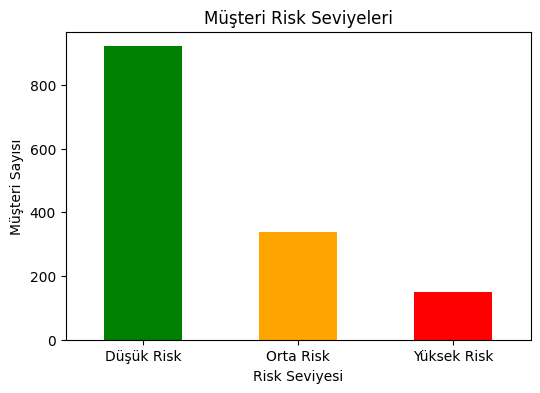

In [18]:
# Risk seviyelerinin dağılımını görselleştirme
plt.figure(figsize=(6, 4))
risk_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Müşteri Risk Seviyeleri")
plt.xlabel("Risk Seviyesi")
plt.ylabel("Müşteri Sayısı")
plt.xticks(rotation=0)
plt.show()

In [19]:
# Özelliklerin önem sıralaması
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

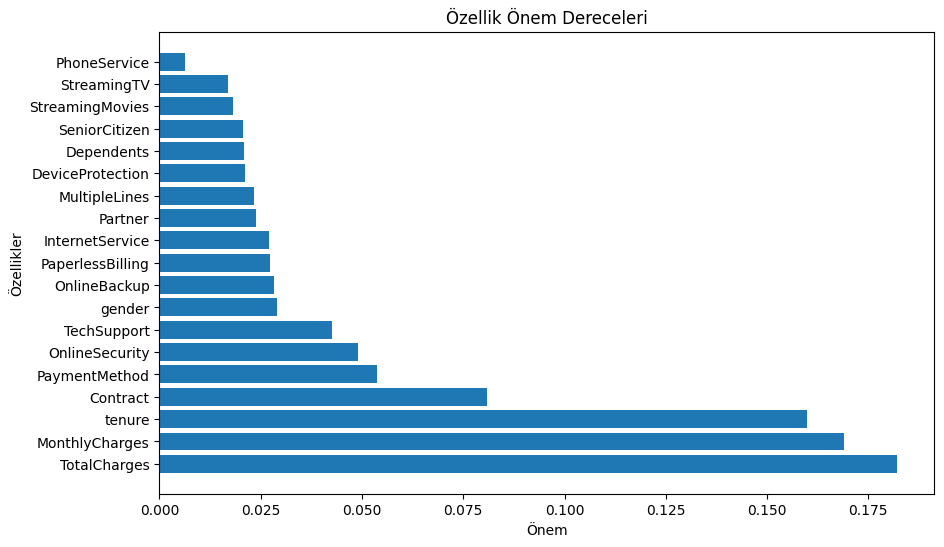

In [20]:
# Görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Özellik Önem Dereceleri')
plt.xlabel('Önem')
plt.ylabel('Özellikler')
plt.show()

In [21]:
#Model performansını detaylandırma
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 0.6592592592592592
Recall: 0.4772117962466488
F1 Score: 0.5536547433903577


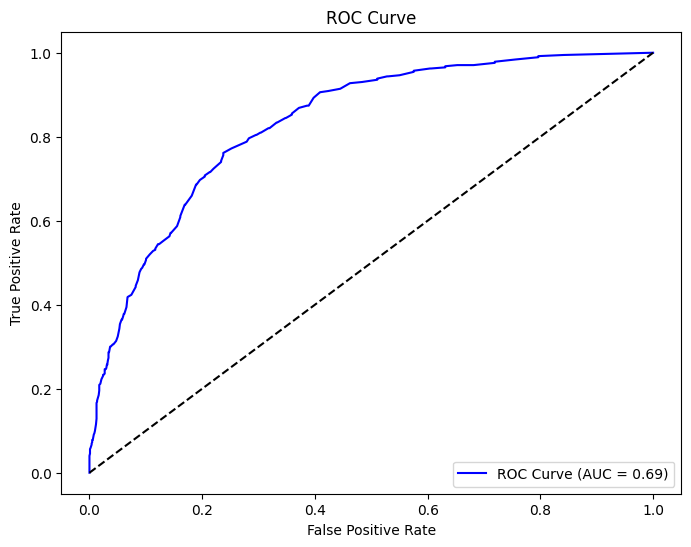

Modelin sınıflandırma performansı geliştirilebilir.


In [22]:
#AUC-ROC Analizi(AUC skoru 0.5'e yakınsa, model sınıfları ayırt edemiyor demektir.AUC skoru 1'e yakınsa, model sınıfları mükemmel bir şekilde ayırt ediyor demektir.)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

if roc_auc > 0.8:
    print("Model, sınıflandırmada oldukça başarılı.")
else:
    print("Modelin sınıflandırma performansı geliştirilebilir.")

In [23]:
# Hiperparametre grid'i
param_grid = {
    'n_estimators': [100, 200, 300],  # Ağaç sayısı
    'max_depth': [10, 20, None],  # Maksimum derinlik
    'min_samples_split': [2, 5, 10],  # Bölünme için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],  # Yaprak düğümdeki minimum örnek sayısı
    'bootstrap': [True, False]  # Rastgele örnekleme
}

# Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# En iyi model ve parametreler
best_rf_model = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)

En iyi parametreler: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
#Optimize edilmiş model doğruluğu
y_pred_best = best_rf_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimize edilmiş model doğruluğu: {accuracy_best * 100:.2f}%")

Optimize edilmiş model doğruluğu: 80.91%


In [ ]:
#Çapraz Doğrulama Skorları
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Çapraz Doğrulama Skorları:", scores.mean())

Çapraz Doğrulama Skorları: 0.7919749535461726
